In [173]:
# !pip install yfinance ta xgboost scikit-learn pandas numpy matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29497 sha256=cc838251132bdd5fd785ea086ff6c2729fec5bd1002f2aca1d0161034300dae8
  Stored in directory: c:\users\abdullah azhar\appdata\local\pip\cache\wheels\5f\67\4f\8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


  DEPRECATION: Building 'ta' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ta'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [175]:
symbol = "BTC-USD"
period = "365d"

df = yf.download(symbol, period=period)
df.head()


C:\Users\Abdullah Azhar\AppData\Local\Temp\ipykernel_26976\302333447.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period=period)
[*********************100%***********************]  1 of 1 completed


Price,Close,Volume
Ticker,BTC-USD,BTC-USD
Date,,
2024-08-10,60945.812500,15745822278
2024-08-11,58719.484375,22759754812
2024-08-12,59354.515625,37078637820
2024-08-13,60609.566406,30327698167
2024-08-14,58737.269531,29961696180


In [154]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,89742.983579,91183.269510,88048.207494,89589.767099,4.692914e+10
std,18014.487393,18127.339447,17845.884842,18021.144877,2.476186e+10
min,53948.753906,54838.144531,52598.699219,53949.085938,9.863214e+09
25%,76408.714844,77097.933594,74535.046875,76088.199219,2.995002e+10
50%,94720.500000,96318.921875,93310.742188,94700.835938,4.271025e+10
75%,103852.406250,105407.710938,101828.285156,103722.496094,5.717246e+10
max,119995.414062,123091.609375,118959.195312,119997.445312,1.817464e+11


In [155]:
df.isnull().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

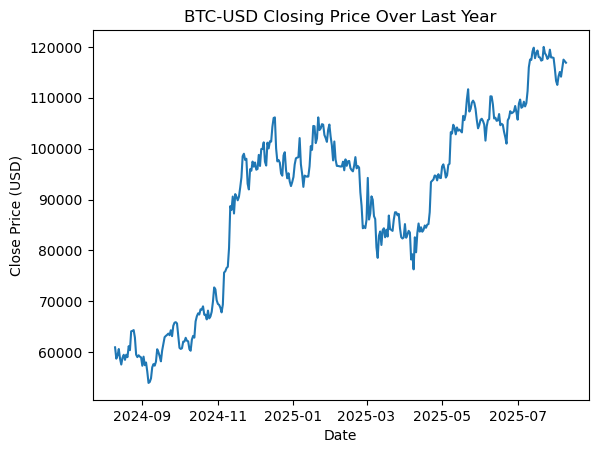

In [156]:
plt.plot(df.index, df['Close'])
plt.title(f"{symbol} Closing Price Over Last Year")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()


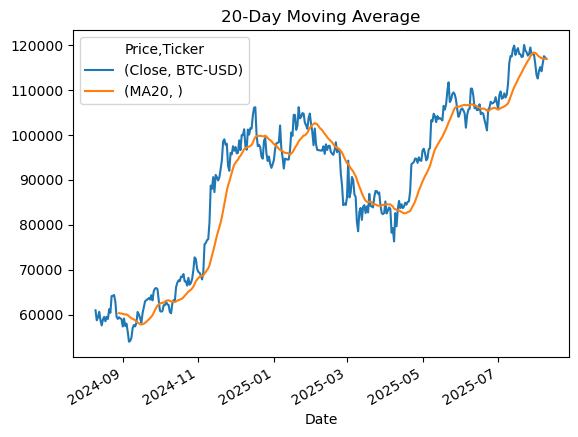

In [157]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df[['Close', 'MA20']].plot()
plt.title("20-Day Moving Average")
plt.show()


In [158]:
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA20']].corr()
corr


,Price,Open,High,Low,Close,Volume,MA20
,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Price,Ticker,,,,,,
Open,BTC-USD,1.000000,0.996319,0.996519,0.993368,0.432138,0.967840
High,BTC-USD,0.996319,1.000000,0.994867,0.997238,0.468619,0.965606
Low,BTC-USD,0.996519,0.994867,1.000000,0.996399,0.403925,0.961952
Close,BTC-USD,0.993368,0.997238,0.996399,1.000000,0.443545,0.962233
Volume,BTC-USD,0.432138,0.468619,0.403925,0.443545,1.000000,0.349193
MA20,,0.967840,0.965606,0.961952,0.962233,0.349193,1.000000


In [159]:
# Create the target column: 1 if next day's close > today's close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop the last row as it has no target (because of shift)
df = df[:-1]

# Create some simple features:
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()

# Drop rows with NaN values created by rolling windows
df = df.dropna()

# Quick look at the new dataframe
df.head()


Price,Close,High,Low,Open,Volume,MA20,Target,MA5,MA10
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
Date,,,,,,,,,
2024-08-29,59388.179688,61184.082031,58786.226562,59027.468750,32224990582,60312.731445,0,61026.828125,61397.738672
2024-08-30,59119.476562,59896.886719,57768.531250,59388.601562,32292756405,60221.414648,0,59984.014844,61408.407031
2024-08-31,58969.898438,59432.593750,58768.785156,59117.480469,12403470760,60233.935352,0,59201.862500,61187.877734
2024-09-01,57325.488281,59062.070312,57217.824219,58969.800781,24592449997,60132.483984,1,58766.133594,60882.235156
2024-09-02,59112.480469,59403.070312,57136.027344,57326.968750,27036454524,60057.629687,0,58783.104688,60384.047656


In [160]:
df['Target']

Date
2024-08-29    0
2024-08-30    0
2024-08-31    0
2024-09-01    1
2024-09-02    0
             ..
2025-08-02    1
2025-08-03    1
2025-08-04    0
2025-08-05    1
2025-08-07    0
Name: Target, Length: 343, dtype: int64

<Axes: >

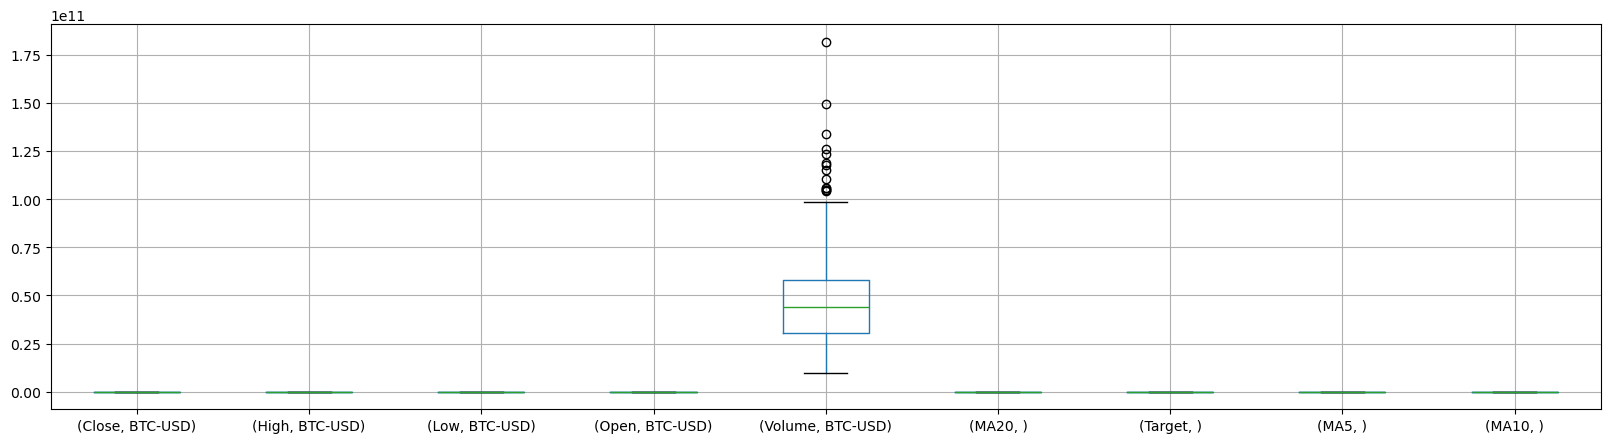

In [163]:
plt.figure(figsize=(20,5))
df.boxplot()

ValueError: Data must be 1-dimensional, got ndarray of shape (363, 1) instead

In [ ]:
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

X_train = train.drop(['target', 'close'], axis=1)
y_train = train['target']
X_test = test.drop(['target', 'close'], axis=1)
y_test = test['target']


In [169]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')


RandomForestClassifier(random_state=42)

In [170]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


Model Accuracy: 50.00%
              precision    recall  f1-score   support

           0       0.43      0.54      0.48        28
           1       0.58      0.47      0.52        38

    accuracy                           0.50        66
   macro avg       0.50      0.50      0.50        66
weighted avg       0.52      0.50      0.50        66



In [171]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [None, 5, 10, 20],           # Max depth of each tree
    'min_samples_split': [2, 5, 10],          # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Min samples required at a leaf node
    'max_features': ['auto', 'sqrt']          # Number of features to consider at each split
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                   # 3-fold cross-validation
    n_jobs=-1,              # Use all CPU cores
    verbose=2               # Print progress
)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Print best params and best score from grid search
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2%}")

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Test set accuracy with best model: {accuracy_best:.2%}")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\envs\ml_env\lib\site-packages\sk

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 49.84%
Test set accuracy with best model: 48.48%
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        28
           1       0.56      0.47      0.51        38

    accuracy                           0.48        66
   macro avg       0.49      0.49      0.48        66
weighted avg       0.50      0.48      0.49        66



In [172]:
print(df['Target'].value_counts(normalize=True))


Target
1    0.516717
0    0.483283
Name: proportion, dtype: float64
